# Getting started with Random Forest

In [1]:
library(MASS)
data(package="MASS")
boston<-Boston

### For this part, you will use the Boston housing data to explore random forests and boosting. The dataset is located in the MASS package. It gives housing values and other statistics in each of 506 suburbs of Boston based on a 1970 census.

In [2]:
dim(boston)
names(boston)

[1] 506  14

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

### Let's also load the randomForest package.

In [3]:
require(randomForest)

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [4]:
rfNews()

### To prepare data for random forest, let's set the seed and create a sample training set of 300 observations.

In [5]:
set.seed(101)
train = sample(1:nrow(boston), 300)

### In this dataset, there are 506 surburbs of Boston. For each surburb, you have variables such as crime per capita, types of industry, average # of rooms per dwelling, average proportion of age of the houses etc. Let's use medv - the median value of owner-occupied homes for each of these surburbs, as the response variable.

### Let's fit a random forest and see how well it performs. As being said, you use the response medv, the median housing value (in $1K dollars), and the training sample set.

In [6]:
rf.boston = randomForest(medv~., data = boston, subset = train)
rf.boston


Call:
 randomForest(formula = medv ~ ., data = boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.30718
                    % Var explained: 85.13

### Printing out the random forest gives its summary: the # of trees (500 were grown), the mean squared residuals (MSR), and the percentage of variance explained. The MSR and % variance explained are based on the out-of-bag estimates, a very clever device in random forests to get honest error estimates.

### The only tuning parameter in a random Forests is the argument called mtry, which is the number of variables that are selected at each split of each tree when you make a split. As seen here, mtry is 4 of the 13 exploratory variables (excluding medv) in the Boston Housing data - meaning that each time the tree comes to split a node, 4 variables would be selected at random, then the split would be confined to 1 of those 4 variables. That's how randomForests de-correlates the trees.

### You're going to fit a series of random forests. There are 13 variables, so let's have mtry range from 1 to 13:
* In order to record the errors, you set up 2 variables oob.err and test.err.
* In a loop of mtry from 1 to 13, you first fit the randomForest with that value of mtry on the train dataset, restricting the number of trees to be 350.
* Then you extract the **mean-squared-error** on the object (the out-of-bag error).
* Then you predict on the test dataset $(boston[-train])$ using fit (the fit of randomForest).
* Lastly, you compute the test error: mean-squared error, which is equals to $mean( (medv - pred)^2 )$.

In [7]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(medv~., data = boston, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, boston[-train,])
  test.err[mtry] = with(boston[-train,], mean( (medv-pred)^2 ))
}

### Basically you just grew 4550 trees (13 times 350). Now let's make a plot using the matplot command. The test error and the out-of-bag error are binded together to make a 2-column matrix. There are a few other arguments in the matrix, including the plotting character values (pch = 23 means filled diamond), colors (red and blue), type equals both (plotting both points and connecting them with the lines), and name of y-axis ($Mean Squared Error$). You can also put a legend at the top right corner of the plot.

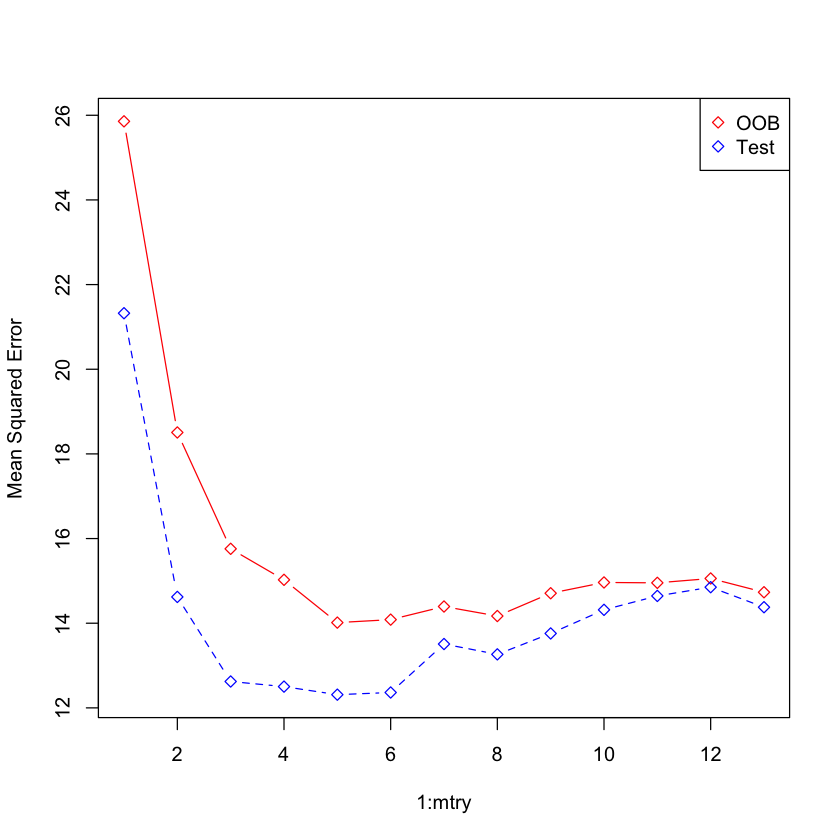

In [8]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", "blue"), type = "b", ylab="Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 23, col = c("red", "blue"))

### Ideally, these 2 curves should line up, but it seems like the test error is a bit lower. However, there's a lot of variability in these test error estimates. Since the out-of-bag error estimate was computed on one dataset and the test error estimate was computed on another dataset, these differences are pretty much well within the standard errors.

### Notice that the red curve is smoothly above the blue curve? These error estimates are very correlated, because the randomForest with mtry = 4 is very similar to the one with mtry = 5. That's why each of the curves is quite smooth. What you see is that mtry around 4 seems to be the most optimal choice, at least for the test error. This value of mtry for the out-of-bag error equals 9.

### So with very few tiers, you have fitted a very powerful prediction model using random forests. How so? The left-hand side shows the performance of a single tree. The mean squared error on out-of-bag is 26, and you've dropped down to about 15 (just a bit above half). This means you reduced the error by half. Likewise for the test error, you reduced the error from 20 to 12.